In [111]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import patsy
import warnings
warnings.simplefilter('ignore')
np.random.seed(1234)
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree


In [112]:
link= "https://raw.githubusercontent.com/d2cml-ai/CausalAI-Course/main/data/wage2015_subsample_inference.csv"

data =pd.read_csv(link)

## 1. 

### a.

In [113]:
X = data.drop(['wage', 'lwage'], axis=1)
y = data[['lwage']]

In [114]:
y = np.log(data['wage']).values
Z = data.drop(['wage', 'lwage'], axis=1)
Z.columns

Index(['rownames', 'sex', 'shs', 'hsg', 'scl', 'clg', 'ad', 'mw', 'so', 'we',
       'ne', 'exp1', 'exp2', 'exp3', 'exp4', 'occ', 'occ2', 'ind', 'ind2'],
      dtype='object')

In [115]:
Zcontrols = patsy.dmatrix('0 + (sex+C(occ2)+C(ind2)+mw+so+we+exp1+exp2+exp3+exp4)**2',
                          Z, return_type='dataframe')

Zcontrols = Zcontrols - Zcontrols.mean(axis=0)

In [116]:
Zcontrols

,C(occ2)[1],C(occ2)[2],C(occ2)[3],C(occ2)[4],C(occ2)[5],C(occ2)[6],C(occ2)[7],C(occ2)[8],C(occ2)[9],C(occ2)[10],...,we:exp1,we:exp2,we:exp3,we:exp4,exp1:exp2,exp1:exp3,exp1:exp4,exp2:exp3,exp2:exp4,exp3:exp4
0,-0.117087,-0.064272,-0.043495,-0.020583,-0.014175,-0.023301,-0.017864,-0.052621,-0.027573,-0.058447,...,-2.979903,-0.64397,-1.736658,-5.25601,-78.928671,-248.779377,-815.793173,-81.579317,-277.601112,-973.333862
1,-0.117087,-0.064272,-0.043495,-0.020583,-0.014175,-0.023301,-0.017864,-0.052621,-0.027573,0.941553,...,-2.979903,-0.64397,-1.736658,-5.25601,215.551329,672.340623,2045.441227,204.544123,609.784920,1777.845195
2,-0.117087,-0.064272,-0.043495,-0.020583,-0.014175,-0.023301,-0.017864,-0.052621,-0.027573,-0.058447,...,-2.979903,-0.64397,-1.736658,-5.25601,-24.038671,-146.204377,-628.517073,-62.851707,-243.706537,-912.194213
3,0.882913,-0.064272,-0.043495,-0.020583,-0.014175,-0.023301,-0.017864,-0.052621,-0.027573,-0.058447,...,-2.979903,-0.64397,-1.736658,-5.25601,73.891329,139.444623,159.088627,15.908863,-33.578136,-363.064653
4,-0.117087,-0.064272,-0.043495,-0.020583,-0.014175,0.976699,-0.017864,-0.052621,-0.027573,-0.058447,...,-2.979903,-0.64397,-1.736658,-5.25601,24.121329,-16.924377,-302.110673,-30.211067,-164.338857,-723.980427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,-0.117087,-0.064272,-0.043495,-0.020583,-0.014175,-0.023301,-0.017864,-0.052621,-0.027573,-0.058447,...,6.020097,0.16603,-1.007658,-4.59991,-75.068671,-244.619377,-811.568973,-81.156897,-277.187320,-972.937919
5146,-0.117087,-0.064272,-0.043495,-0.020583,-0.014175,-0.023301,-0.017864,-0.052621,-0.027573,-0.058447,...,9.020097,0.79603,-0.008658,-3.18241,-65.078671,-230.444377,-792.590673,-79.259067,-274.732777,-969.833035
5147,-0.117087,-0.064272,-0.043495,0.979417,-0.014175,-0.023301,-0.017864,-0.052621,-0.027573,-0.058447,...,8.020097,0.56603,-0.405658,-3.79191,-69.048671,-236.539377,-801.368773,-80.136877,-275.947200,-971.467499
5148,-0.117087,-0.064272,-0.043495,-0.020583,-0.014175,-0.023301,-0.017864,-0.052621,0.972427,-0.058447,...,7.020097,0.35603,-0.736658,-4.25601,-72.358671,-241.180377,-807.473873,-80.747387,-276.718761,-972.416216


In [117]:
Zhet = patsy.dmatrix('0 + (sex+mw+so+we)',
                     Z, return_type='dataframe')
Zhet = Zhet - Zhet.mean(axis=0)

In [118]:
Zhet['clg'] = Z['clg']
Zinteractions = patsy.dmatrix('0 + clg + clg * (sex+mw+so+we)',
                              Zhet, return_type='dataframe')
interaction_cols = [c for c in Zinteractions.columns if c.startswith('clg')]

In [119]:
X = pd.concat([Zinteractions, Zcontrols], axis=1)
X.shape

(5150, 835)

In [120]:
! git clone https://github.com/maxhuppertz/hdmpy.git

fatal: destination path 'hdmpy' already exists and is not an empty directory.


In [121]:
import sys
sys.path.insert(1, "./hdmpy")

### b.

In [122]:
import hdmpy
from sklearn.base import BaseEstimator


class RLasso(BaseEstimator):

    def __init__(self, *, post=True):
        self.post = post

    def fit(self, X, y):
        self.rlasso_ = hdmpy.rlasso(X, y, post=self.post)
        return self

    def predict(self, X):
        return np.array(X) @ np.array(self.rlasso_.est['beta']).flatten() + np.array(self.rlasso_.est['intercept'])


def lasso_model():
    return RLasso(post=False)

In [123]:
alpha = {}
res_y, res_D, epsilon = {}, {}, {}
for c in interaction_cols:
    print(f"Double Lasso for target variable {c}")
    D = X[c].values
    W = X.drop([c], axis=1)
    res_y[c] = y - lasso_model().fit(W, y).predict(W)
    res_D[c] = D - lasso_model().fit(W, D).predict(W)
    final = LinearRegression(fit_intercept=False).fit(res_D[c].reshape(-1, 1), res_y[c])
    epsilon[c] = res_y[c] - final.predict(res_D[c].reshape(-1, 1))
    alpha[c] = [final.coef_[0]]

V = np.zeros((len(interaction_cols), len(interaction_cols)))
for it, c in enumerate(interaction_cols):
    Jc = np.mean(res_D[c]**2)
    for itp, cp in enumerate(interaction_cols):
        Jcp = np.mean(res_D[cp]**2)
        Sigma = np.mean(res_D[c] * epsilon[c] * epsilon[cp] * res_D[cp])
        V[it, itp] = Sigma / (Jc * Jcp)

n = X.shape[0]
for it, c in enumerate(interaction_cols):
    alpha[c] += [np.sqrt(V[it, it] / n)]

df = pd.DataFrame.from_dict(alpha, orient='index', columns=['point', 'stderr'])

summary = pd.DataFrame()
summary['Estimate'] = df['point']
summary['Std. Error'] = df['stderr']
summary['p-value'] = norm.sf(np.abs(df['point'] / df['stderr']), loc=0, scale=1) * 2
summary['ci_lower'] = df['point'] - 1.96 * df['stderr']
summary['ci_upper'] = df['point'] + 1.96 * df['stderr']
summary

Double Lasso for target variable clg
Double Lasso for target variable clg:sex
Double Lasso for target variable clg:mw
Double Lasso for target variable clg:so
Double Lasso for target variable clg:we


,Estimate,Std. Error,p-value,ci_lower,ci_upper
clg,0.143604,0.016108,4.878729e-19,0.112032,0.175176
clg:sex,-0.003092,0.030546,9.193622e-01,-0.062963,0.056778
clg:mw,0.042197,0.043585,3.329644e-01,-0.043229,0.127623
clg:so,-0.004830,0.040447,9.049469e-01,-0.084106,0.074446
clg:we,-0.067521,0.042548,1.125227e-01,-0.150914,0.015872


### c.

In [124]:
Drootinv = np.diagflat(1 / np.sqrt(np.diag(V)))
scaledCov = Drootinv @ V @ Drootinv
np.random.seed(123)
U = np.random.multivariate_normal(np.zeros(scaledCov.shape[0]), scaledCov, size=10000)
z = np.max(np.abs(U), axis=1)
c = np.percentile(z, 95)

summary = pd.DataFrame()
summary['Estimate'] = df['point']
summary['CI lower'] = df['point'] - c * df['stderr']
summary['CI upper'] = df['point'] + c * df['stderr']
summary

,Estimate,CI lower,CI upper
clg,0.143604,0.102425,0.184783
clg:sex,-0.003092,-0.081181,0.074996
clg:mw,0.042197,-0.069224,0.153618
clg:so,-0.004830,-0.108230,0.098570
clg:we,-0.067521,-0.176290,0.041248


### d. 

Aunque obtener un título universitario tiene un impacto positivo en los ingresos, las interacciones analizadas no muestran efectos significativos. Esto sugiere que no hay diferencias relevantes en cómo el sexo o la ubicación geográfica influyen en los beneficios económicos de tener un título.

## 2. DAG

### a.

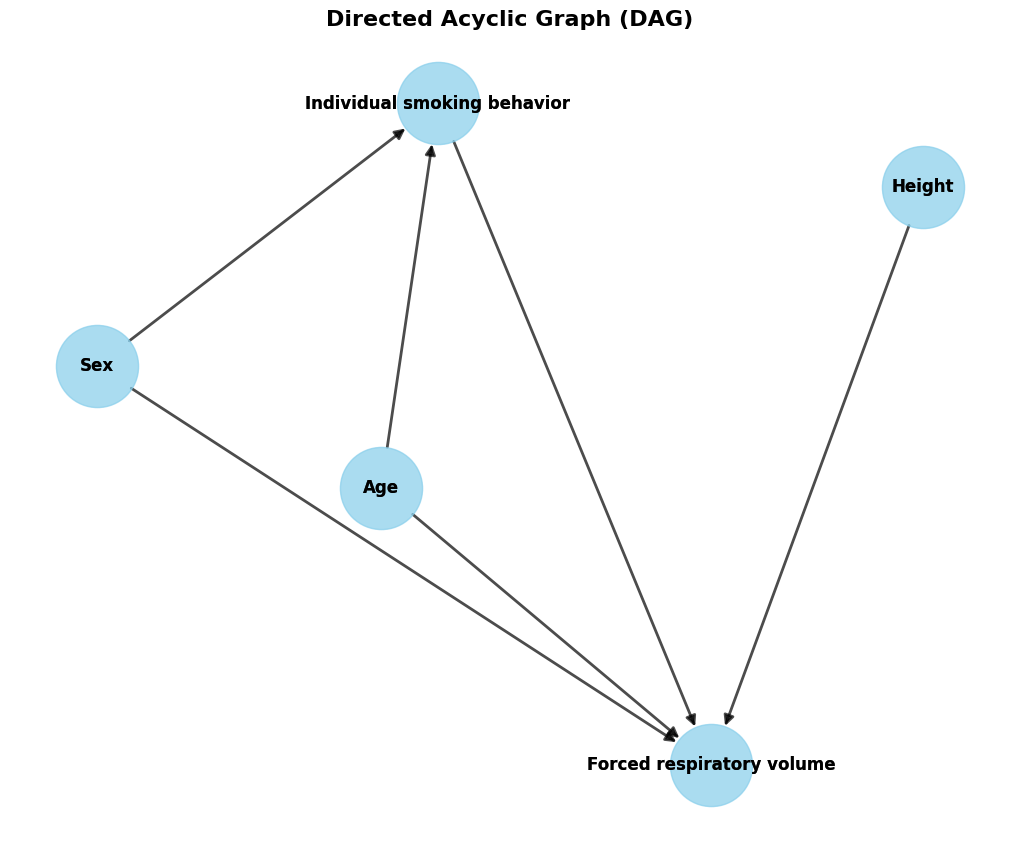

In [125]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph()

graph.add_edges_from([
    ("Individual smoking behavior", "Forced respiratory volume"), 
    ("Age", "Forced respiratory volume"), 
    ("Age", "Individual smoking behavior"), 
    ("Sex", "Individual smoking behavior"), 
    ("Sex", "Forced respiratory volume"), 
    ("Height", "Forced respiratory volume"), 
])

plt.figure(figsize=(10, 8))

pos = nx.spring_layout(graph, seed=42)  

nx.draw(graph, pos, with_labels=True, node_size=3500, node_color="skyblue", font_size=12, 
        font_weight="bold", edge_color="black", width=2, arrowsize=15, alpha=0.7, font_color="black")

for label, (x, y) in pos.items():
    plt.text(x, y, label, color='black', ha='center', va='center', fontsize=12, fontweight='bold')

plt.title("Directed Acyclic Graph (DAG)", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


confounders: 
"Age" afecta tanto a "Individual smoking behavior" como a "Forced respiratory volume".
"Sex" afecta tanto a "Individual smoking behavior" como a "Forced respiratory volume".

colliders:
"Forced respiratory volume" es afectado por  "Individual smoking behavior", "Age", "Sex", y "Height".
controles

### b.

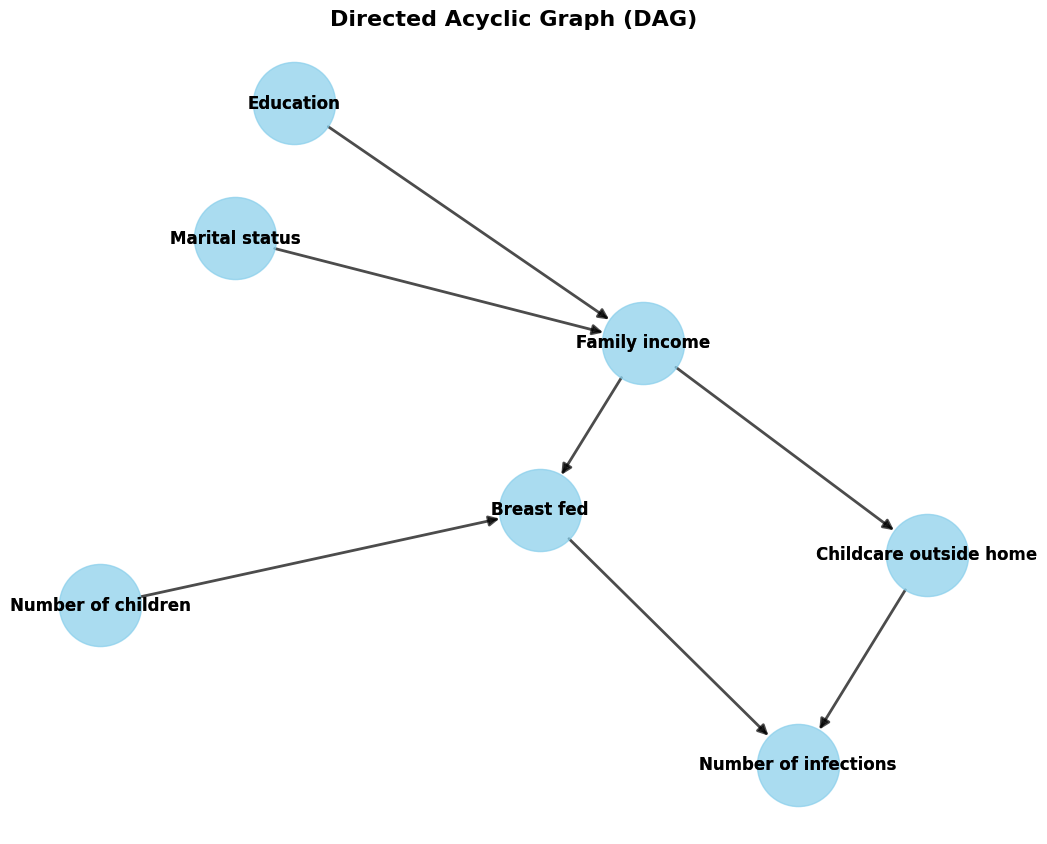

In [126]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph()

graph.add_edges_from([
    ("Breast fed", "Number of infections"), 
    ("Marital status", "Family income"),      
    ("Family income", "Breast fed"),        
    ("Family income", "Childcare outside home"),  
    ("Education", "Family income"),           
    ("Number of children", "Breast fed"),  
    ("Childcare outside home", "Number of infections")  
])

plt.figure(figsize=(10, 8))

pos = nx.spring_layout(graph, seed=42) 

nx.draw(graph, pos, with_labels=True, node_size=3500, node_color="skyblue", font_size=12, 
        font_weight="bold", edge_color="black", width=2, arrowsize=15, alpha=0.7, font_color="black")

for label, (x, y) in pos.items():
    plt.text(x, y, label, color='black', ha='center', va='center', fontsize=12, fontweight='bold')

plt.title("Directed Acyclic Graph (DAG)", fontsize=16, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()



Confounders
"Family income" afecta tanto a "Breast fed" como a "Childcare outside home".  

Colliders:
"Family income" es afectado por "Marital status" y "Education".  
"Number of infections" es afectado por flechas de "Breast fed" y "Childcare outside home".

## 3.

### 3.1.

In [127]:
file= "https://raw.githubusercontent.com/selva86/datasets/master/Hitters.csv"

In [128]:
data = pd.read_csv(file)

In [129]:
data= data.dropna()

In [130]:
data_trabajada = patsy.dmatrix('0+ AtBat + Hits + HmRun + Runs + RBI + Walks + Years + CAtBat + CHits + CHmRun + CRuns + CRBI + CWalks + C(League) + C(Division) + PutOuts + Assists + Errors + Salary + C(NewLeague)',
    data,
    return_type='dataframe'
)

print(data_trabajada.head())


   C(League)[A]  C(League)[N]  C(Division)[T.W]  C(NewLeague)[T.N]  AtBat  \
1           0.0           1.0               1.0                1.0  315.0   
2           1.0           0.0               1.0                0.0  479.0   
3           0.0           1.0               0.0                1.0  496.0   
4           0.0           1.0               0.0                1.0  321.0   
5           1.0           0.0               1.0                0.0  594.0   

    Hits  HmRun  Runs   RBI  Walks  ...  CAtBat   CHits  CHmRun  CRuns   CRBI  \
1   81.0    7.0  24.0  38.0   39.0  ...  3449.0   835.0    69.0  321.0  414.0   
2  130.0   18.0  66.0  72.0   76.0  ...  1624.0   457.0    63.0  224.0  266.0   
3  141.0   20.0  65.0  78.0   37.0  ...  5628.0  1575.0   225.0  828.0  838.0   
4   87.0   10.0  39.0  42.0   30.0  ...   396.0   101.0    12.0   48.0   46.0   
5  169.0    4.0  74.0  51.0   35.0  ...  4408.0  1133.0    19.0  501.0  336.0   

   CWalks  PutOuts  Assists  Errors  Salary  
1   

In [131]:
data_trabajada=data_trabajada.drop("C(League)[A]", axis=1)

### 3.2.

In [132]:
train, test  = train_test_split(data_trabajada ,train_size = .9, shuffle = True)


In [133]:
x_train = train.drop("Salary", axis=1)
y_train = train["Salary"]

In [134]:
x_test = test.drop("Salary", axis=1)
y_test = test["Salary"]

### 3.3.

#### 3.3.1

In [135]:

model_hat = LinearRegression().fit(x_train.values, y_train.values)

beta_hat = np.hstack((model_hat.intercept_, model_hat.coef_))

y_pred = model_hat.predict(x_train.values)

mse = mean_squared_error(y_train.values, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")


Error Cuadrático Medio (MSE): 94746.9145959579


In [136]:

x_train_with_intercept = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train_with_intercept).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     13.01
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.97e-26
Time:                        16:56:46   Log-Likelihood:                -1687.0
No. Observations:                 236   AIC:                             3414.
Df Residuals:                     216   BIC:                             3483.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               210.0562     97.96

#### 3.3.2. y 3.3.3.

In [137]:


M = 10_000

n_features = x_train.shape[1]


beta_hat_boost = np.zeros((M, n_features + 1))  

for i in range(M):
    Z = np.hstack((x_train.values, y_train.values.reshape(-1, 1)))

    random_index = np.random.choice(Z.shape[0], Z.shape[0], replace=True)

    Z_boost = Z[random_index]

    model_boost = LinearRegression().fit(Z_boost[:, :-1], Z_boost[:, -1])

    beta_hat_boost[i, :] = np.hstack((model_boost.intercept_, model_boost.coef_))

lower_bound_b0_boost = np.percentile(beta_hat_boost[:, 0], 2.5)
upper_bound_b0_boost = np.percentile(beta_hat_boost[:, 0], 97.5)

lower_bound_b_boost = np.percentile(beta_hat_boost[:, 1:], 2.5, axis=0)
upper_bound_b_boost = np.percentile(beta_hat_boost[:, 1:], 97.5, axis=0)

print('b0 simple bootstrap (Intercepto)')
print(f"{lower_bound_b0_boost} to {upper_bound_b0_boost}")
print('--------------------')
print('b1, b2, ..., bn simple bootstrap (Coeficientes)')
for j in range(n_features):
    print(f"b{j+1}: {lower_bound_b_boost[j]} to {upper_bound_b_boost[j]}")


b0 simple bootstrap (Intercepto)
-40.25996201338273 to 504.5452130138729
--------------------
b1, b2, ..., bn simple bootstrap (Coeficientes)
b1: -89.55120109883455 to 223.0427994062013
b2: -203.30537754894894 to -36.09369632926491
b3: -187.41085890945067 to 145.82377784643649
b4: -3.7272176854746375 to -0.4194762962631943
b5: 0.06103515399776353 to 12.65997329891485
b6: -11.971788760857594 to 17.544595875137997
b7: -7.474281688594271 to 5.822963893116561
b8: -6.033985089014813 to 6.854880503756222
b9: 1.3376561081742055 to 9.365901867066357
b10: -31.973410940645017 to 18.841438304763283
b11: -0.5718893906036556 to 0.2348147832049565
b12: -1.8625366637953693 to 2.2617307955561183
b13: -5.16220884718793 to 3.7808127128172933
b14: -0.39857485668909065 to 3.40395234348495
b15: -1.0072583498526846 to 2.740084016286335
b16: -1.6347399128687832 to 0.08688864989187413
b17: 0.09563637998808808 to 0.49901318128148126
b18: -0.13204170747375987 to 1.023763632307196
b19: -12.701212395962468 to 4.8

In [138]:
n = beta_hat.shape[0]

lower_bounds_hall = np.zeros(n)
upper_bounds_hall = np.zeros(n)

for i in range(n):
    delta_b = beta_hat_boost[:, i] - beta_hat[i]  
    lower_bounds_hall[i] = beta_hat[i] - np.percentile(delta_b, 97.5)  
    upper_bounds_hall[i] = beta_hat[i] - np.percentile(delta_b, 2.5)  

print("Resultados por beta:")
for i in range(n):
    print(f"Beta {i}: Intervalo de confianza empirico [{lower_bounds_hall[i]:.4f}, {upper_bounds_hall[i]:.4f}]")


Resultados por beta:
Beta 0: Intervalo de confianza empirico [-84.4327, 460.3724]
Beta 1: Intervalo de confianza empirico [-109.4753, 203.1187]
Beta 2: Intervalo de confianza empirico [-212.8196, -45.6079]
Beta 3: Intervalo de confianza empirico [-179.4482, 153.7864]
Beta 4: Intervalo de confianza empirico [-3.9566, -0.6489]
Beta 5: Intervalo de confianza empirico [1.3036, 13.9025]
Beta 6: Intervalo de confianza empirico [-10.9207, 18.5957]
Beta 7: Intervalo de confianza empirico [-7.7545, 5.5428]
Beta 8: Intervalo de confianza empirico [-7.0512, 5.8377]
Beta 9: Intervalo de confianza empirico [2.2299, 10.2582]
Beta 10: Intervalo de confianza empirico [-28.2403, 22.5746]
Beta 11: Intervalo de confianza empirico [-0.5186, 0.2881]
Beta 12: Intervalo de confianza empirico [-2.4113, 1.7130]
Beta 13: Intervalo de confianza empirico [-6.0904, 2.8526]
Beta 14: Intervalo de confianza empirico [-0.2259, 3.5766]
Beta 15: Intervalo de confianza empirico [-0.4424, 3.3049]
Beta 16: Intervalo de con

#### 3.3.4.

In [139]:
x_test_with_intercept = np.hstack((np.ones((x_test.shape[0], 1)), x_test.values))

y_pred_boost = np.zeros((M, x_test.shape[0]))

for i in range(M):
    y_pred_boost[i, :] = np.dot(x_test_with_intercept, beta_hat_boost[i, :])

mse_boost = np.mean((y_pred_boost - y_test.values.reshape(1, -1)) ** 2, axis=1)

avg_mse_boost = np.mean(mse_boost)

print(f"Promedio de MSE entre muestras bootstrap: {avg_mse_boost}")

Promedio de MSE entre muestras bootstrap: 84599.94722718994


### 3.4.

### 3.4.1

In [140]:
alphas = np.exp(np.linspace(-2, 10, 100))
folds = KFold(3, shuffle = True, random_state = 123)
rmses = np.zeros(alphas.shape)

for i, alpha in enumerate(alphas):
        tree = DecisionTreeRegressor(ccp_alpha = alpha, random_state = 123)
        results = cross_validate(tree, x_train, y_train, cv = folds, scoring = "neg_root_mean_squared_error")
        rmses[i] = (- results["test_score"]).mean()

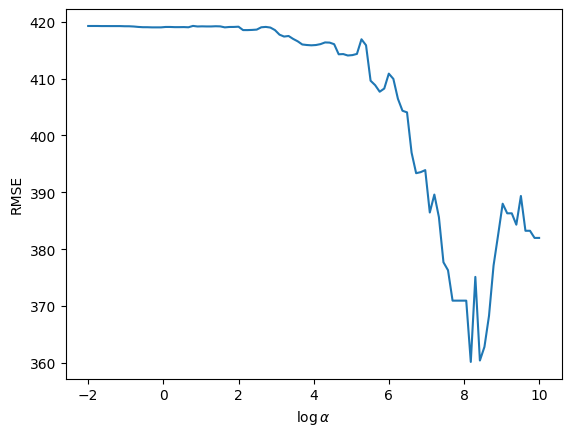

In [141]:
_, ax = plt.subplots()
ax.plot(np.log(alphas), rmses)
ax.set_xlabel("$\\log\\alpha$")
ax.set_ylabel("RMSE")
plt.show()

In [142]:
optimal_alpha = alphas[np.argmin(rmses)]
optimal_alpha

3575.3493899890987

### 3.4.2.

In [143]:
tree_model_prune = DecisionTreeRegressor(ccp_alpha = optimal_alpha, random_state = 123)
tree_model_prune.fit(x_train, y_train)
pruned_predictions = tree_model_prune.predict(x_test)
mse=np.sqrt(((y_test - pruned_predictions) ** 2).mean())
print(f"Promedio de MSE de regression tree: {mse}")


Promedio de MSE de regression tree: 307.71829723120067


### 3.5.

Entre los dos modelos el que tiene un mejor perfomance es el modelo de regression trees ya que presenta un MSE menor al de bootstrapping cuando se prueba la capacidad predictiva con la data de testeo